In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("SuperStore_Sales_Dataset.csv")
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [15]:
c=df['Category'].value_counts()
print(c)

Category
Office Supplies    3569
Furniture          1249
Technology         1083
Name: count, dtype: int64


In [16]:
df.isna()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
5897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
5898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
5899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True


In [17]:
df.drop("ind1", axis=1, inplace=True)
df.drop("ind2", axis=1, inplace=True)

In [18]:
df.Returns.isna().value_counts()

Returns
True     5614
False     287
Name: count, dtype: int64

In [19]:
df["Returns"].fillna(0, inplace=True)
df.Returns.isna().value_counts()

Returns
False    5901
Name: count, dtype: int64

### Método de pago más utilizado

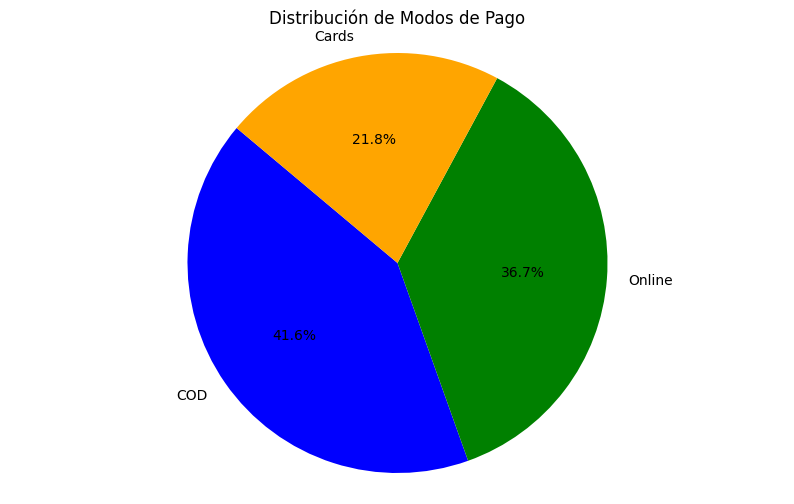

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

payment_mode_counts = df['Payment Mode'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange'])
plt.axis('equal')

plt.title('Distribución de Modos de Pago')
plt.show()


### Top 10 ciudades con más transacciones

In [21]:

top_10_cities = df['City'].value_counts().head(10)

print("Las 10 ciudades con más transacciones son:")
print(top_10_cities)


Las 10 ciudades con más transacciones son:
City
New York City    563
Los Angeles      430
Philadelphia     310
San Francisco    304
Seattle          282
Houston          204
Chicago          197
Columbus         138
Dallas           110
Springfield      100
Name: count, dtype: int64


### Método de pago más utilizado por cada una de las top 10 ciudades

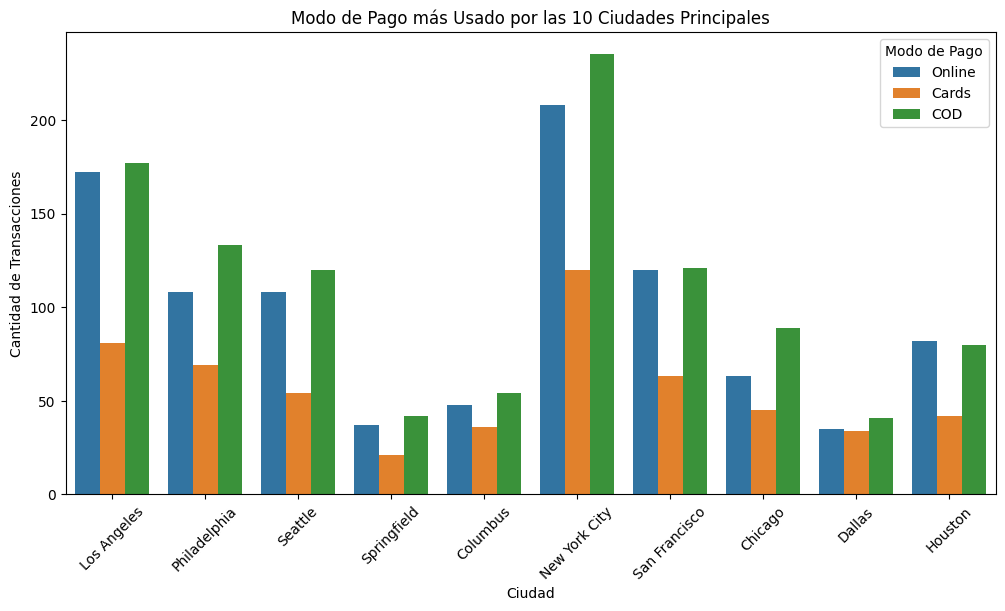

In [22]:
df_top_10_cities = df[df['City'].isin(top_10_cities.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Payment Mode')
plt.title('Modo de Pago más Usado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Modo de Pago')

plt.show()

### Categoría de producto más comprada por cada una de las 10 ciudades

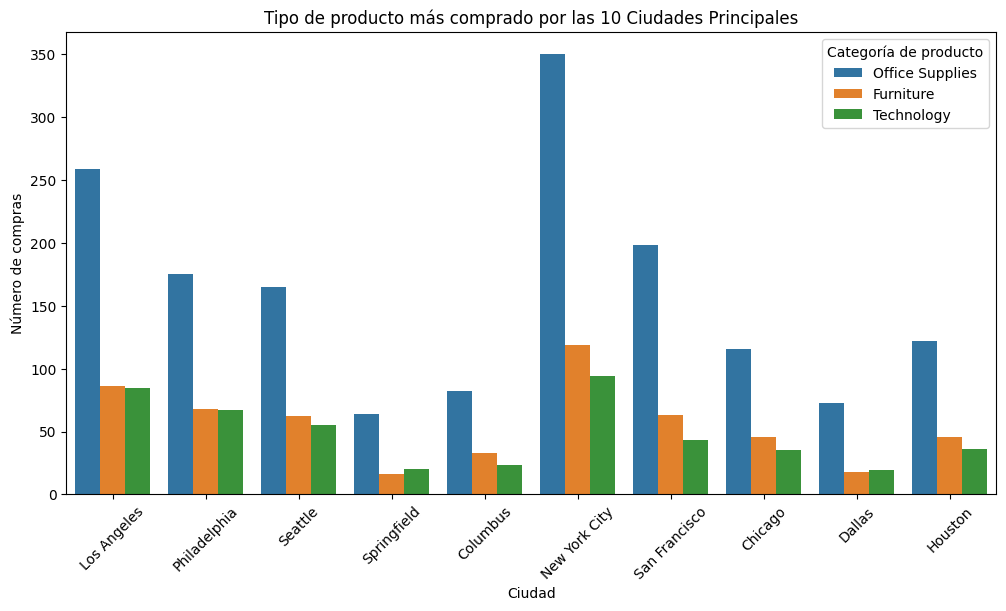

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Category')
plt.title('Tipo de producto más comprado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Número de compras')
plt.legend(title='Categoría de producto')